In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [4]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
sample_sizes = [2000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../Output/sample_sizes")
test_mcms, test_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [5]:
# can always only do distance between two
# probably want distance own vs other
# the mcm that maximises the distance is the one that is selected in the classifier

In [6]:
# # select a digit that is the "test image", the one that is shown to all
# # select the most indicative icc for own vs a test image of that category
# # NOTE: in real life we do not know what category the test image is from
# # cannot take most indicative icc
# all_byk = []
# sample_idx = 0
# run_idx = 0
# test_digit = 0 # we show a 0 to all mcm and see who has highest reponse
# # mcms_range = range(10)
# mcms_range = [3,]
# for mcm_idx in mcms_range:
#     digit_pair = [mcm_idx,test_digit] # own vs test digit
#     _, icc_data,dists = utils.distmap_from_testprobs(test_probs, test_mcms, digit_pair, mcm_idx, sample_idx,run_idx, return_iccdata=True,return_dists=True)
#     ord_distidcs = np.argsort(dists)[::-1]
#     by_k = np.cumprod(icc_data[ord_distidcs],axis=0)[:,:,digit_pair]
#     all_byk.append(by_k)

In [7]:
sample_idx = 0
run_idx = 0
digit_pair = [3,5]
all_byk_pair = utils.get_all_byk_pair(test_probs, test_mcms, digit_pair, sample_idx, run_idx)

In [9]:
data_max = np.max([np.max(all_byk_pair[i]) for i in range(len(all_byk_pair))])
data_min = np.min([np.min(all_byk_pair[i]) for i in range(len(all_byk_pair))])

maxs = [np.max(all_byk_pair[i]) for i in range(len(all_byk_pair))]
mins = [np.min(all_byk_pair[i]) for i in range(len(all_byk_pair))]
print(maxs,mins)

[0.9925662168915542, 0.9581459270364817] [1.5429474367572827e-38, 9.223126376887415e-45]


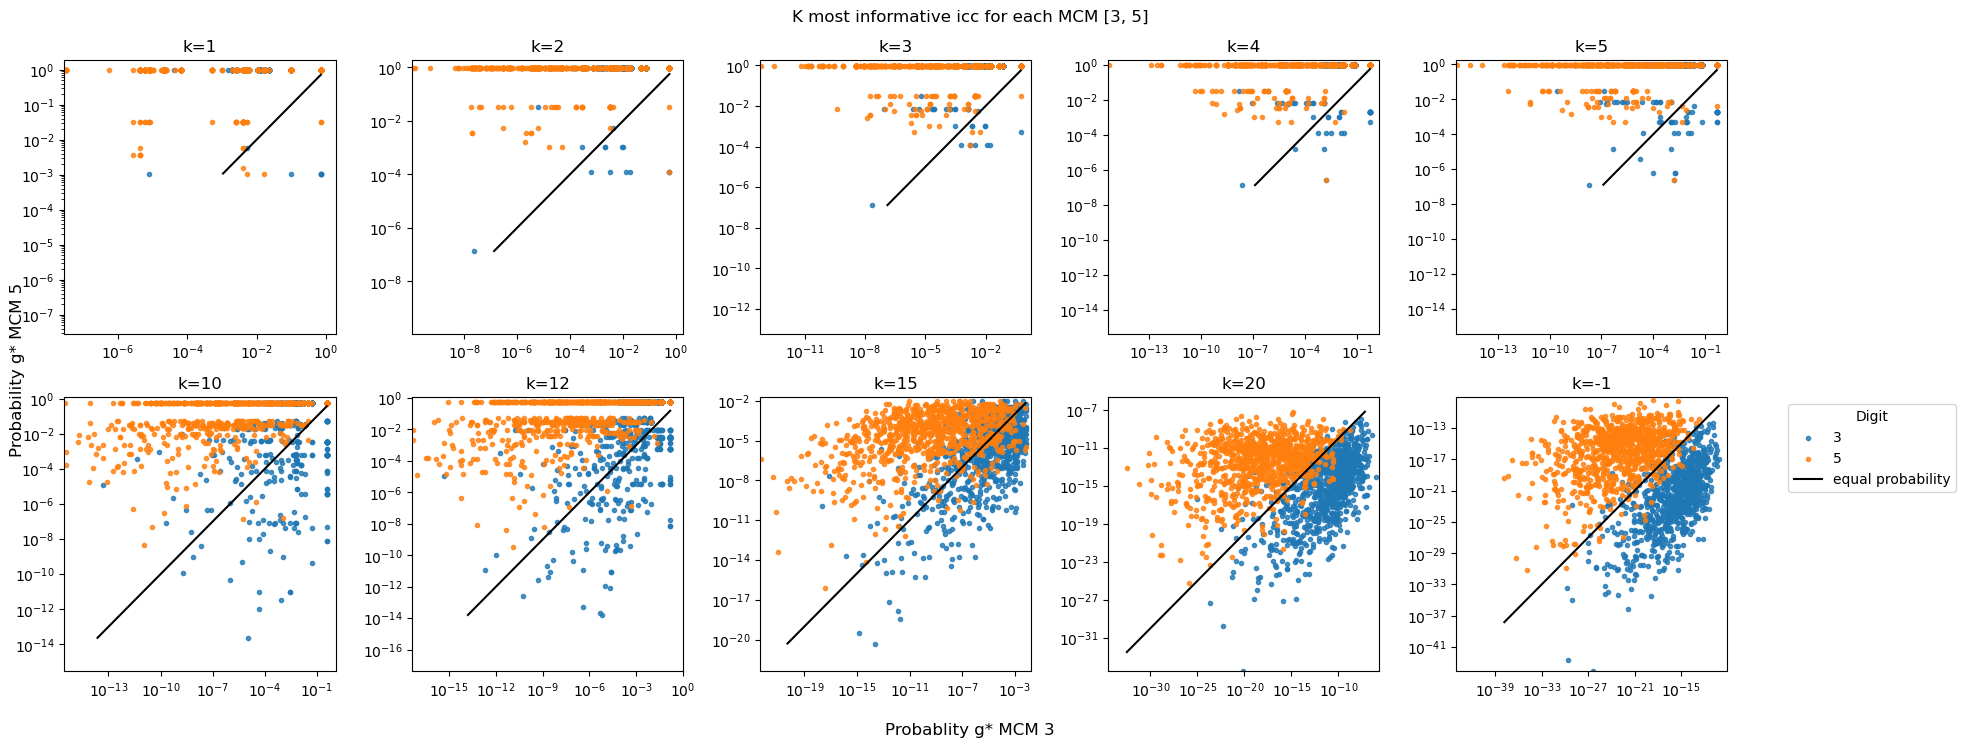

In [10]:
# take say top 5, 3 , 1 in subplots
# k = 3 e.g.,
# take top 3 k for every icc and plot histogram of test


fig, axs = plt.subplots(2,5,figsize=(20,7.5))
# fig, axs = plt.subplots(1,2,figsize=(20,7.5))

axs = axs.ravel()
# logbins = np.geomspace(data_min,data_max, 40)
top_ks = [1,2,3,4,5,
          10,12,15,20,-1]
colors = myplot.get_list_fromcmap("tab10", N=10)
# top_ks = [1,4]

for j, k in enumerate(top_ks):
    ax = axs[j]

    max = np.min([np.max(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    min = np.max([np.min(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    
    mAsA = all_byk_pair[0][k,:,0]
    mAsB = all_byk_pair[0][k,:,1]
    mBsA = all_byk_pair[1][k,:,0]
    mBsB = all_byk_pair[1][k,:,1]
        
    ax.scatter(mAsA,mBsA, label=f"{digit_pair[0]}",alpha=.8,marker=".") # data for seeing digit A
    ax.scatter(mAsB,mBsB, label=f"{digit_pair[1]}",alpha=.8,marker=".") # data for seeing digit B
    ax.plot((min,max),(min,max),color="black", label="equal probability")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"k={k}")
    
    m_max = np.max([np.max(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    m_min = np.min([np.min(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    ax.set_ylim((m_min*.9,m_max*2))
    ax.set_xlim((m_min*.9,m_max*2))
    
fig.supxlabel(f"Probablity g* MCM {digit_pair[0]}")
fig.supylabel(f"Probability g* MCM {digit_pair[1]}")


plt.legend(title="Digit", bbox_to_anchor=(1.2,1,0,0))
fig.suptitle(f"K most informative icc for each MCM {digit_pair}")
fig.tight_layout()



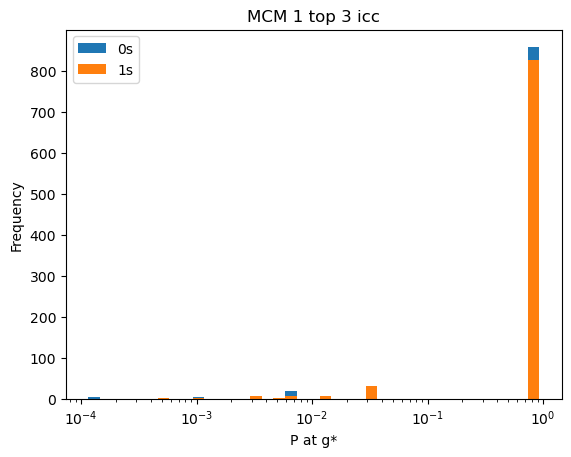

In [11]:
k = 3
mi = 1
mAsA = all_byk_pair[mi][k,:,0]
mAsB = all_byk_pair[mi][k,:,1]
logbins = np.geomspace(mAsB.min(),mAsB.max(), 40)

plt.figure()
plt.title(f"MCM {mi} top {3} icc")
plt.hist(mAsA,bins=logbins, label="0s",histtype="barstacked")
plt.hist(mAsB,bins=logbins, label="1s",histtype="barstacked")
plt.xlabel("P at g*")
plt.ylabel("Frequency")
plt.legend()
plt.xscale("log")
plt.show()


For presentation

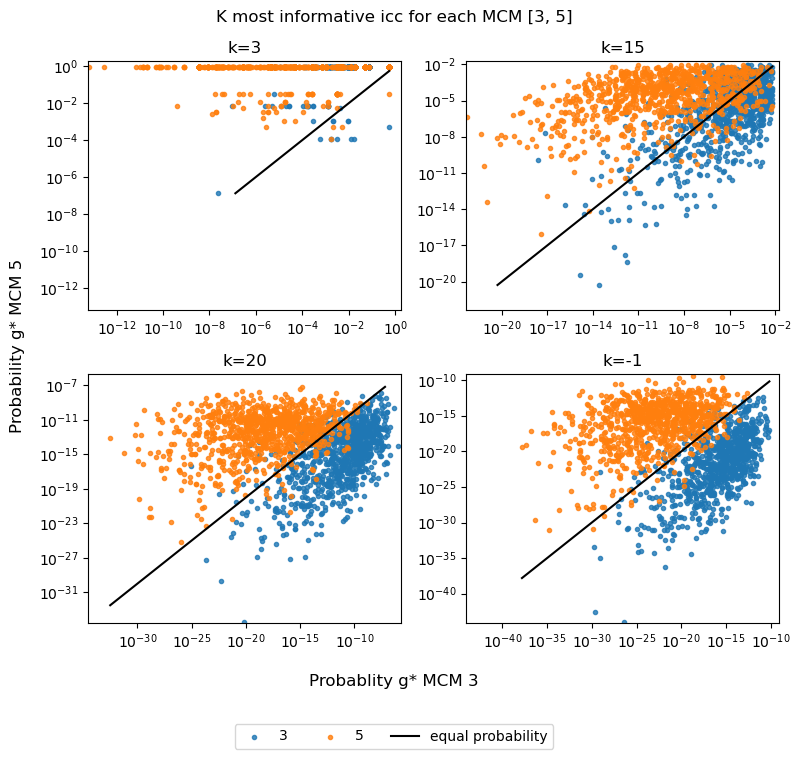

In [12]:
# take say top 5, 3 , 1 in subplots
# k = 3 e.g.,
# take top 3 k for every icc and plot histogram of test


fig, axs = plt.subplots(2,2,figsize=(8,7))#, sharex=True,sharey=True)
axs = axs.ravel()
# logbins = np.geomspace(data_min,data_max, 40)
top_ks = [3,15,20,-1]

colors = myplot.get_list_fromcmap("tab10", N=10)
# top_ks = [1,4]

for j, k in enumerate(top_ks):
    ax = axs[j]

    max = np.min([np.max(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    min = np.max([np.min(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    
    mAsA = all_byk_pair[0][k,:,0]
    mAsB = all_byk_pair[0][k,:,1]
    mBsA = all_byk_pair[1][k,:,0]
    mBsB = all_byk_pair[1][k,:,1]
        
    ax.scatter(mAsA,mBsA, label=f"{digit_pair[0]}",alpha=.8,marker=".") # data for seeing digit A
    ax.scatter(mAsB,mBsB, label=f"{digit_pair[1]}",alpha=.8,marker=".") # data for seeing digit B
    ax.plot((min,max),(min,max),color="black", label="equal probability")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"k={k}")
    m_max = np.max([np.max(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    m_min = np.min([np.min(all_byk_pair[i][k,...]) for i in range(len(all_byk_pair))])
    ax.set_ylim((m_min*.9,m_max*2))
    ax.set_xlim((m_min*.9,m_max*2))
    
    
fig.supxlabel(f"Probablity g* MCM {digit_pair[0]}")
fig.supylabel(f"Probability g* MCM {digit_pair[1]}")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,ncol=3, loc='upper center', bbox_to_anchor=(0.5, -.03))

# plt.legend(title="Digit", bbox_to_anchor=(1.2,1,0,0))
fig.suptitle(f"K most informative icc for each MCM {digit_pair}")
fig.tight_layout()

